In [ ]:
#RUN THIS LINE OF CODE IF pd.read_sql_query DOES NOT WORK
#!pip install pandas==0.24.2

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


In [2]:
from sqlalchemy import create_engine
import getpass 
import psycopg2
import helper_functions as hp
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
db_string = "postgres://MONEYDB:{}@moneydb.cpbpjwbxydzi.us-east-2.rds.amazonaws.com:5432/postgres".format(getpass.getpass())

db = create_engine(db_string)

········


In [4]:
query = """

select * from public."Upward_Trends_Curr"
where "Day"= '1 Days Ago'
order by "MACD" desc

"""

In [5]:


fr = pd.read_sql_query(query,con=db)
fr

,index,Date,ticker,MACD,signal,Close,Upward,Day,DailyVariance,Daily_Volatility,Annualized_Volatility,BATCH_LOAD_TIME
0,17,2020-07-09,ZBRA,0.340181,0.371945,261.820007,1,1 Days Ago,0.000753,0.027444,0.433929,2020-07-09 15:35:54.893938
1,15,2020-07-09,VRSN,0.189306,-0.652495,211.759995,1,1 Days Ago,0.000197,0.014034,0.221894,2020-07-09 15:35:54.893938
2,11,2020-07-09,OFLX,0.143236,-0.005622,106.617798,1,1 Days Ago,0.002129,0.046145,0.729623,2020-07-09 15:35:54.893938
3,1,2020-07-09,AMD,0.107505,-0.241940,57.490101,1,1 Days Ago,0.000808,0.028433,0.449566,2020-07-09 15:35:54.893938
4,4,2020-07-09,ENPH,0.084735,-1.146356,55.299999,1,1 Days Ago,0.004183,0.064680,1.022679,2020-07-09 15:35:54.893938
5,5,2020-07-09,ENTG,0.080086,0.048067,61.130001,1,1 Days Ago,0.000578,0.024041,0.380120,2020-07-09 15:35:54.893938
6,10,2020-07-09,MOMO,0.063124,-0.329878,20.840000,1,1 Days Ago,0.001779,0.042183,0.666968,2020-07-09 15:35:54.893938
7,2,2020-07-09,BGFV,0.055324,0.025078,2.685000,1,1 Days Ago,0.008339,0.091320,1.443895,2020-07-09 15:35:54.893938
8,13,2020-07-09,TCX,0.029789,-0.176353,58.980000,1,1 Days Ago,0.000646,0.025410,0.401768,2020-07-09 15:35:54.893938
9,12,2020-07-09,QLYS,0.026158,-0.853772,109.410004,1,1 Days Ago,0.000545,0.023337,0.368985,2020-07-09 15:35:54.893938


##### 26 Days vs 12 Day MA (When 12 day moves above the 26 day, this indicates an upward trend signal)

In [7]:
ticker = 'AMD'

In [8]:



SDOW_q = """

select * from public."All_Prices_Full"
where ticker = '{}'

""".format(ticker)

In [9]:
SDOW = pd.read_sql_query(SDOW_q,con=db)


In [10]:
SDOW

,index,Date,Open,Close,Volume,High,Low,ticker,DOW,DOW_Mapped,...,DailyReturn,DailyReturnLog,DailyVariance,Prev_Day_Compare_Open,Prev_Day_Growth_Open,Prev_Week_Compare_Close,Prev_Week_Growth_Close,Prev_Week_Compare_Open,Prev_Week_Growth_Open,BATCH_UPLOAD


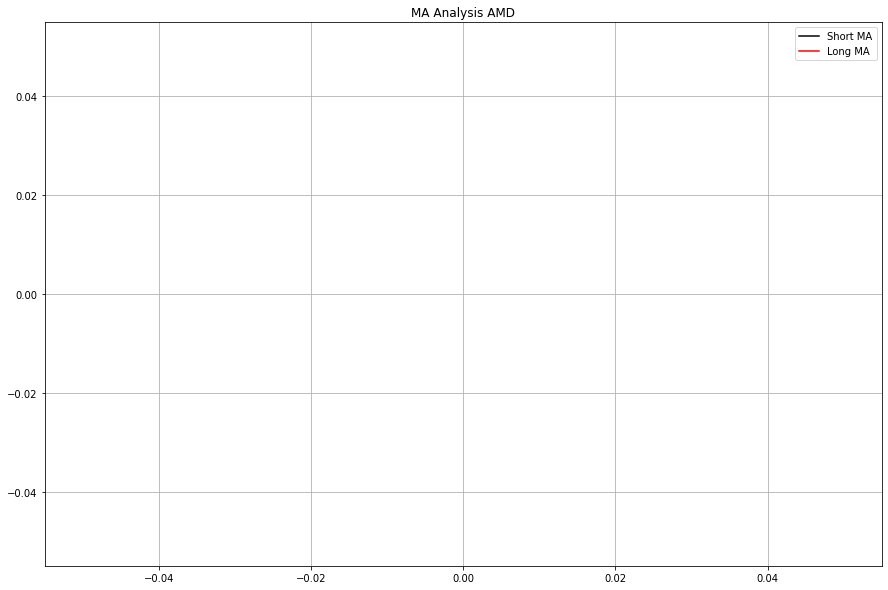

In [11]:




plt.figure(figsize=(15,10))
plt.plot(SDOW['Date'],SDOW['12Day_Moving_Average_Close'],label='Short MA',color='k')
plt.plot(SDOW['Date'],SDOW['26Day_Moving_Average_Close'],label='Long MA',color='r')


for values in range(len(SDOW)):
    if values!=0:
        if SDOW['MACD'].iloc[values]<0:
            if SDOW['MACD'].iloc[values-1]>0:
                plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='red',s=150)
                
    if SDOW['MACD'].iloc[values]>=0:
        if SDOW['MACD'].iloc[values-1]<0:
            plt.scatter(SDOW['Date'].iloc[values-1],SDOW['12Day_Moving_Average_Close'].iloc[values-1],marker='*',
                       color='green',s=150)
            
            
plt.title('MA Analysis {}'.format(ticker))
plt.grid()
plt.legend()
plt.show()

##### When the blue line ocilates above the zero line, this indicates that the short term MA is above the long term MA....BUY signal.
##### When the blue line ocilates below the zero line, this indicates that the short term MA is below the long term MA....SELL signal.

In [ ]:
plt.figure(figsize=(15,10))
plt.title('MACD Analysis {}'.format(ticker))
plt.plot(SDOW['Date'],SDOW['MACD'],label='MACD')
plt.plot(SDOW['Date'],SDOW['signal'],label='Signal')
plt.hlines(0,SDOW['Date'].min(),SDOW['Date'].max(),'r')
#plt.bar(SDOW['Date'],SDOW['hist'])
plt.legend()
plt.xticks(rotation=90)
plt.show()